# Описание данных
## Данные для первой части
### Файл hypothesis.csv. 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## Данные для второй части

### Файл orders.csv.
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

### Файл visitors.csv. 
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# 1. Откроем файлы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import scipy.stats as stats

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

## Hypothesis

In [2]:
try:
    hypothesis = pd.read_csv('C:/Users/arvore/Downloads/Яндекс/Принятие решений в бизнесе/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

display(hypothesis.duplicated().sum())    
    
hypothesis.info()    
display(hypothesis)

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## orders

In [3]:
try:
    orders = pd.read_csv('C:/Users/arvore/Downloads/Яндекс/Принятие решений в бизнесе/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

display(orders.duplicated().sum())

orders.info()    
display(orders)

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [4]:
orders['date'] = pd.to_datetime(orders['date'])
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   orderId  1197 non-null   int64         
 1   userId   1197 non-null   int64         
 2   date     1197 non-null   datetime64[ns]
 3   revenue  1197 non-null   int64         
 4   group    1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [5]:
#проверим, есть ли пользователи, попавшие в обе тестовых группы
orders_false = orders.groupby('userId').agg({'group':'nunique'}).reset_index()
orders_false.columns = ['userId', 'count']

orders_false.query('count > 1').head()

,userId,count
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


In [6]:
#так как есть пересечения, нужно исклучить их для получения верных результатов
orders = orders.merge(orders_false, on='userId', how='left')
orders = orders.query('count < 2')
del orders['count']

orders

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


## visitors

In [7]:
try:
    visitors = pd.read_csv('C:/Users/arvore/Downloads/Яндекс/Принятие решений в бизнесе/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

display(visitors.duplicated().sum())
visitors.info()    
display(visitors)

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
print('Группы теста в orders:', orders['group'].unique())
print()
print('Группы теста в visitors:', visitors['group'].unique())

Группы теста в orders: ['B' 'A']

Группы теста в visitors: ['A' 'B']


In [10]:
print('Минимальная дата анализа:', orders['date'].dt.date.min())
print('Максимальная дата анализа:', orders['date'].dt.date.max())

Минимальная дата анализа: 2019-08-01
Максимальная дата анализа: 2019-08-31


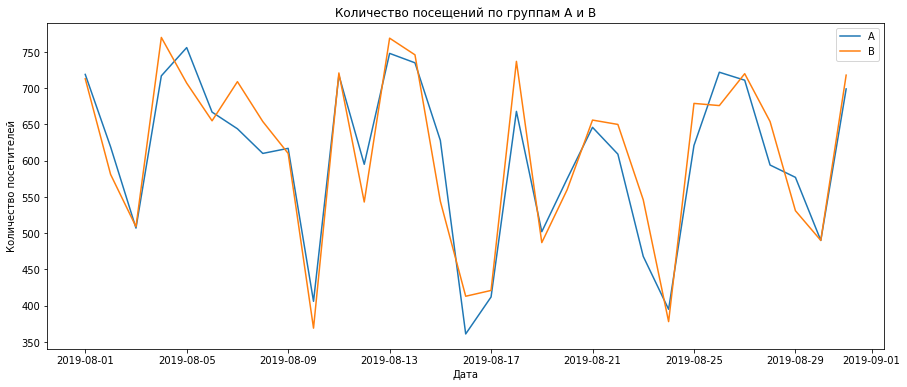

In [11]:
plt.figure(figsize=(15,6))

visitorsA = visitors.query('group == "A"')
visitorsB = visitors.query('group == "B"')

plt.plot(visitorsA['date'], visitorsA['visitors'], label='A')
plt.plot(visitorsB['date'], visitorsB['visitors'], label='B')

plt.title('Количество посещений по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Количество посетителей')
plt.legend() 

plt.show()

### Выводы:
1. У нас есть 9 гипотиз.
2. Исключены пользователи, попавшие в группы А и В одновременно.
3. Период исследования - **с 1 августа 2019 по 31 августа 2019**.
4. Количество пользователей для обеих групп сильно варьируется от месяца к месяцу.

# 2. Приоритизация гипотез

## 2.1. ICE

In [12]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']), 2)

display(hypothesis[['Hypothesis', 'Impact', 'Confidence', 'Efforts','ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,1,1.00


Наиболее перспективны гипотезы:
 - 8 (Запустить акцию, дающую скидку на товар в день рождения)
 - 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)
 - 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)

## 2.2. RICE

In [13]:
hypothesis['RICE'] = round((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']), 2)

display(hypothesis[['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts','RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


Наиболее перспективны гипотезы:
 - 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)
 - 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	)
 - 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)
 - 6 (Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию)

### Вывод:

1. Стоит начать тестирование с 7 гипотезы (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), так как она входит в топ-3 обоих показателей. Она затронет наибольшее количество пользователей.
2. Затем стоит протестировать 0 гипотезу (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей), она тоже входит в топ-3 обоих показателей. Она незначительно повлияет на старых пользователей, зато привлечет новых. 
3. Также стоит обратить внимение на 8 гипотезу (Запустить акцию, дающую скидку на товар в день рождения). Она затронет пользователей только один день в году (можно растянуть на три дня), но с большей вероятностью принесет пользу, так как все любят подарки на день рождения.

Стоит тестировать сначала 7, а не 0, так как показатель RICE выше в два раза, а ICE ниже всего на 15%. Соответсвенно, ее успех должен быть выше.

*Приоретизация изменилась из-за учета количество пользователей, на которых повлияет тест гипотезы. Чем больше пользователей это затронет, тем выше показатель.*

*Для выбора гипотезы для анализа необходимо учитывать оба показателя, так как в связке они покажут наиболее перспективную гипотезу.*



# 3. Анализ A/B-теста

In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'orderId': 'nunique',
            'userId': 'nunique',
            'date': 'max',
            'revenue': 'sum',
            'group': 'max',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
    'orders',
    'buyers',
    'date',
    'revenue',
    'group',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['orders', 'buyers', 'date', 'revenue', 'group', 'visitors']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['orders', 'buyers', 'date', 'revenue', 'group', 'visitors']]

cumulativeData

,orders,buyers,date,revenue,group,visitors
0,23,19,2019-08-01,142779,A,719
1,17,17,2019-08-01,59758,B,713
2,42,36,2019-08-02,234381,A,1338
3,40,39,2019-08-02,221801,B,1294
4,66,60,2019-08-03,346854,A,1845
...,...,...,...,...,...,...
57,510,490,2019-08-29,4746610,B,17708
58,460,437,2019-08-30,3311413,A,18037
59,531,511,2019-08-30,4955833,B,18198
60,468,445,2019-08-31,3364656,A,18736


In [15]:
print('Минимальная дата анализа:', cumulativeData['date'].dt.date.min())
print('Максимальная дата анализа:', cumulativeData['date'].dt.date.max())

Минимальная дата анализа: 2019-08-01
Максимальная дата анализа: 2019-08-31


## 3.1. Кумулятивная выручка по группам

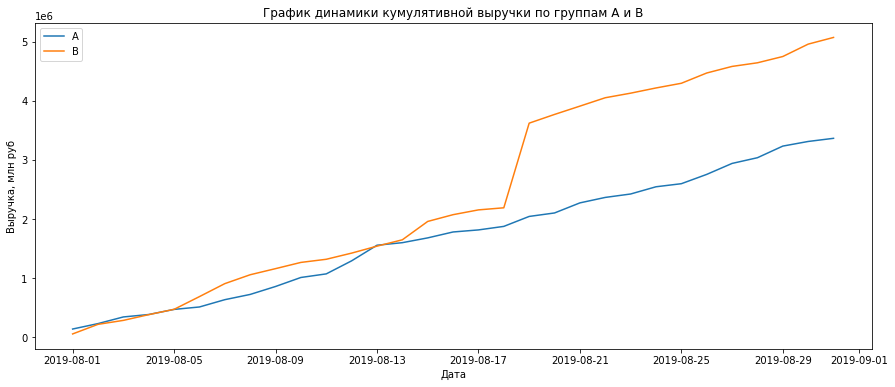

In [16]:
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График динамики кумулятивной выручки по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Выручка, млн руб')
plt.legend() 

plt.show()

1. Кумулятивная выручка группы А растет линейно, и она меньше, чем у группы В.
2. В группе В есть резкий скачок в районе 18-го августа, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

## 3.2. Кумулятивный средний чек по группам

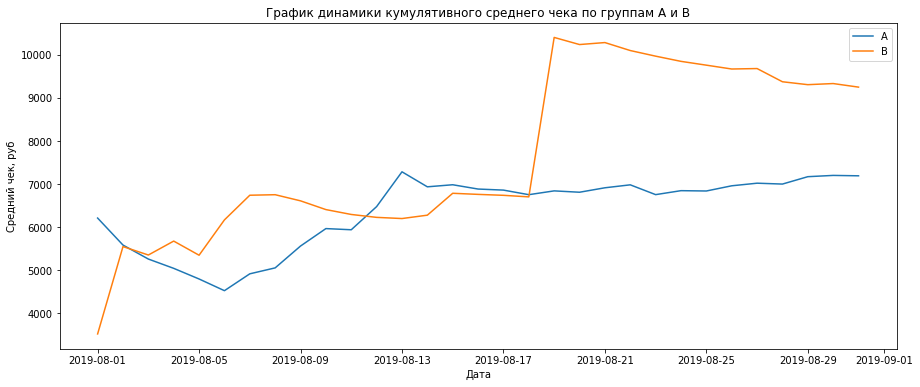

In [17]:
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб')
plt.legend() 

plt.show()

1. Средний чек в группе А через какое-то время стабилизировался. 
2. Средний чек группы В показал резкий рывок, что говорит в пользу версии о дорогой покупке.

## 3.3. Относительное изменение кумулятивного среднего чека группы B к группе A

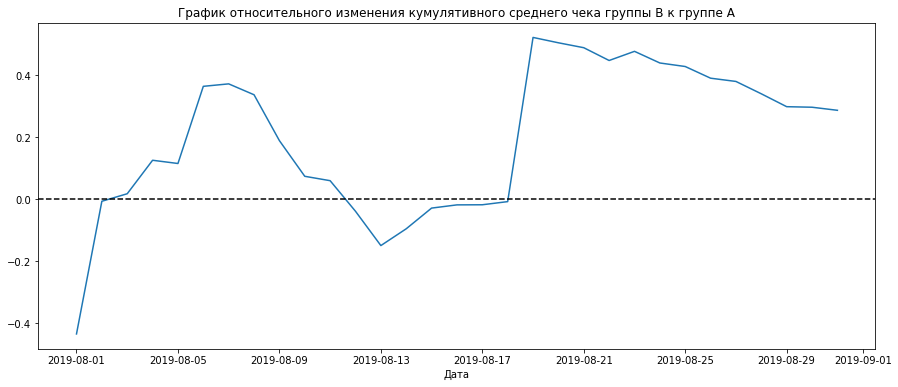

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--') 

plt.show()

1. График резко скачет в нескольких точках - определённо, имеют место какие-то выбросы и крупные заказы.

## 3.4. Кумулятивное среднее количество заказов на посетителя по группам

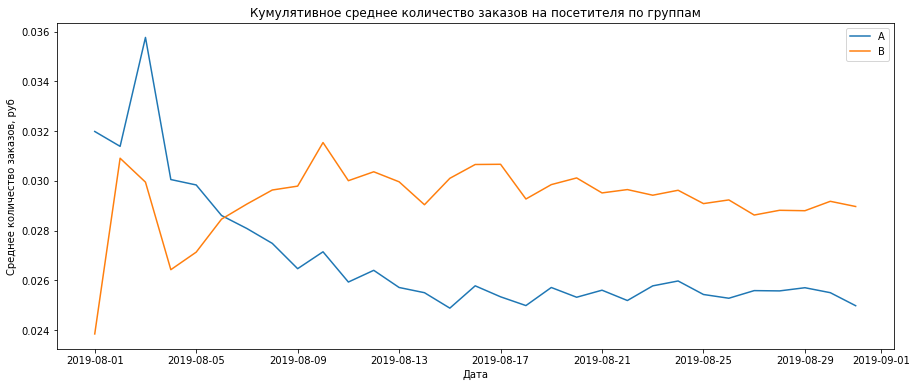

In [19]:
plt.figure(figsize=(15,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов, руб')
plt.legend() 

plt.show()

1. Сначала конверсии колебались, но довольно быстро выровнялись.
2. Результат группы В кажется более привлекательным.

## 3.5. Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

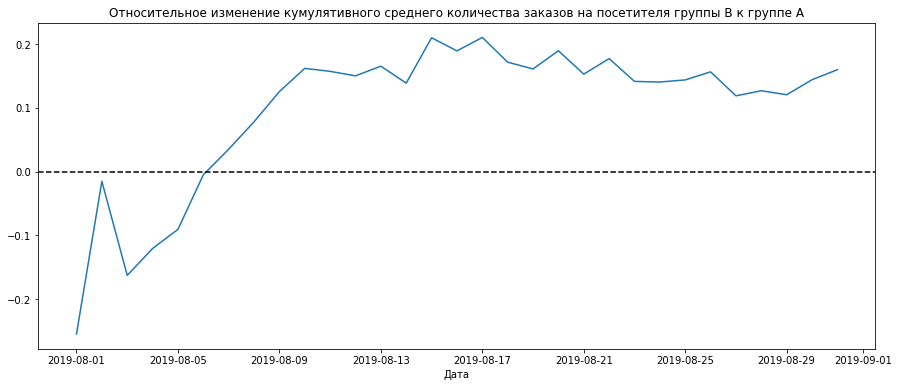

In [20]:
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--') 

plt.show()

1. До 3 августа конверсия группы была ниже конверсии группы А, далее наблюдается рост конверсии В относительно А.

## 3.6.1. Зависимость количества заказов по пользователям

In [21]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers['orders'])))

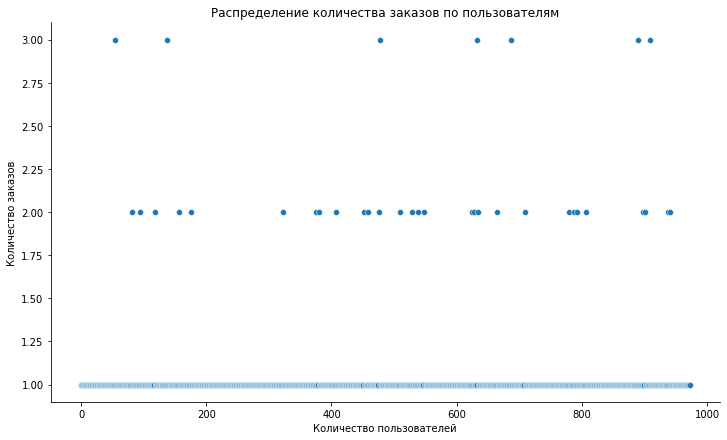

In [22]:
sns.relplot(
    x=x_values,
    y=ordersByUsers['orders'], 
    kind="scatter",
    height=6,
    aspect=1.7)

plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

plt.show()

## 3.6.2. 95-й и 99-й перцентили количества заказов на пользователя

In [23]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

1. Менее 1% покупателей - 2 и более заказов, 95% покупателей делают только 1 заказ.

2. Выбираем верхнюю границ в 2 заказа.

## 3.7.1. Зависимость стоимости заказов

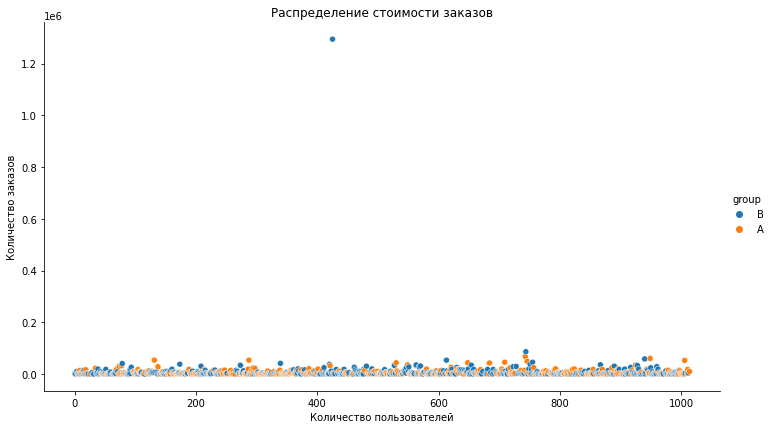

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))

sns.relplot(
    x=x_values,
    y=orders['revenue'], 
    hue=orders['group'],
    kind="scatter",
    height=6,
    aspect=1.7)

plt.title('Распределение стоимости заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

plt.show()

Так как есть одно аномально большое значение, стоит построить график учетом лимита для понимания общей картины

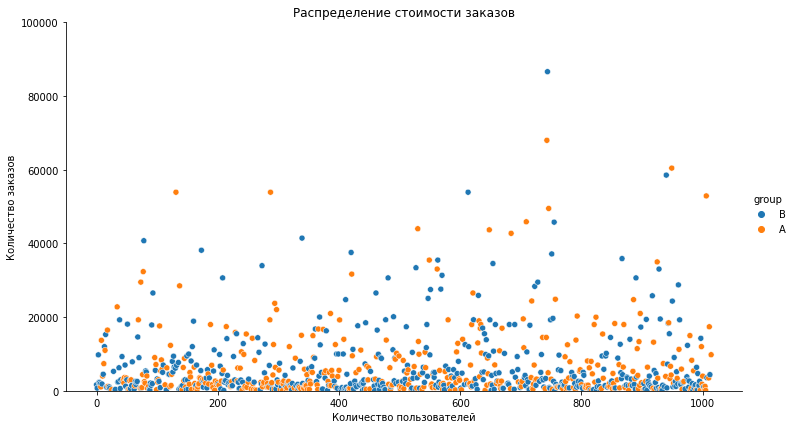

In [25]:
sns.relplot(
    x=x_values,
    y=orders['revenue'], 
    hue=orders['group'],
    kind="scatter",
    height=6,
    aspect=1.7)

plt.title('Распределение стоимости заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.ylim(0, 100000)

plt.show()

## 3.7.2. 95-й и 99-й перцентили стоимости заказов

In [26]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

1. Стоимость заказов свыше 26 785 характерна 5% пользователям, 53 904 - 1%.

2. Выберем верхнюю границу - 53 904.

## 3.10. Статистическая значимость различий

### 3.10.1. Среднее количество заказов на посетителя между группами по «сырым» данным

Введем основную и альтернативные гипотезы:

 - *Н0: различий в конверсии между группами нет*
 - *Н1: различия в конверсии между группами есть*
 

Уровень значимости: alpha = 0,05

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Названия столбцов данных:
 - date — дата;
 - ordersPerDateA — количество заказов в выбранную дату в группе A;
 - revenuePerDateA — суммарная выручка в выбранную дату в группе A;
 - ordersPerDateB — количество заказов в выбранную дату в группе B;
 - revenuePerDateB — суммарная выручка в выбранную дату в группе B;
 - ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
 - revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
 - ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
 - revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
 - visitorsPerDateA — количество пользователей в выбранную дату в группе A;
 - visitorsPerDateB — количество пользователей в выбранную дату в группе B;
 - visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
 - visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [29]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value =', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный выигрыш группы B =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
Относительный выигрыш группы B = 0.160


1. По неочищенным данным различия в конверсии между группами есть.

2. P-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 


### 3.10.2. Средний чек заказа между группами по «сырым» данным

Введем основную и альтернативные гипотезы:

 - *Н0: различий в конверсии между группами нет*
 - *Н1: различия в конверсии между группами есть*
 

Уровень значимости: alpha = 0,05

In [30]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный выигрыш группы B =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.829
Относительный выигрыш группы B = 0.287


1. P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу нет. 

2. Средний чек группы B значительно выше среднего чека группы A.

### 3.10.3. Среднее количество заказов на посетителя между группами по «очищенным» данным

Введем основную и альтернативные гипотезы:

 - *Н0: различий в конверсии между группами нет*
 - *Н1: различия в конверсии между группами есть*
 

Уровень значимости: alpha = 0,05

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head(5))
print('количество аномалий -', abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: userId, dtype: int64

количество аномалий - 16


Мы видим, что всего 16 заказов являются аномалиями, превышающими хотя бы один из критериев

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный выигрыш группы B =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
Относительный выигрыш группы B = 0.189


1. На очищенных данных разница в конверсии между группами есть.
2. Относительный прирост конверсии группы В отнистельно группы А увеличился на 1,5% относительно "сырых" данных.

### 3.10.4. Средний чек заказа между группами по «очищенным» данным

Введем основную и альтернативные гипотезы:

 - *Н0: различий в конверсии между группами нет*
 - *Н1: различия в конверсии между группами есть*
 

Уровень значимости: alpha = 0,05

In [33]:
print('p-value =', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный выигрыш группы B =', 
    "{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.788
Относительный выигрыш группы B = -0.03234


1. P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 
2. По разнице средних чеков групп различий практически нет. 
3. Средние чеки группы В ниже, чем у группы А.

# Выводы

На основании входных данных, предоставленных интернет-магазином был проведено исследование и вынесены рекомендации, изложенные ниже.

### В части приоритизации гипотез из списка, предоставленных отделом Маркетинга следует в первую очередь обратить внимание на гипотезы:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

3. Запустить акцию, дающую скидку на товар в день рождения	


### В части анализа А/В теста:

1. Есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы В выше, чем в А, на 18%;
2. Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
3. График относительного изменения кумулятивного среднего количества заказов группы B к группе A показывает, что результаты группы В стабильно лучше группы А;

На основании вышеизложенного рекомендуем остановить тест, зафиксировав победу группы B (ее конверсия значительно выше конверсии группы А).